In [1]:
import random

In [2]:
random.randint(-90,90)

In [3]:
# 6.1.4
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit

# Import the requests library.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Print the coordinates of the cities.
coordinates = list(lat_lngs)
#print(coordinates)

In [6]:
# 6.1.5 Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mataura pf
bilma ne
invermere ca
minot us
kaitangata nz
ammon us
gornopravdinsk ru
qaanaaq gl
norman wells ca
muravlenko ru
mahadday weyne so
ushuaia ar
yellowknife ca
hobart au
hermanus za
provideniya ru
new norfolk au
punta arenas cl
houma us
karacakoy tr
jamestown sh
port alfred za
cajamarca pe
amderma ru
cervo es
chokurdakh ru
kruisfontein za
gryazovets ru
darab ir
itapaci br
kapaa us
puerto ayora ec
yeppoon au
rikitea pf
ukiah us
ribeira grande pt
claver ph
chipiona es
lorengau pg
vila velha br
pevek ru
pacific grove us
punta arenas cl
jamestown sh
constantine dz
tuktoyaktuk ca
rikitea pf
puerto ayora ec
tasiilaq gl
zlobin by


In [8]:
# Create a list for holding the cities. All cities will be retained on "cities"
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

46

In [9]:
import requests
requests.__version__

'2.24.0'

In [10]:
# Import the API key.
from config import weather_api_key
weather_api_key

'f8e0c6b3a91b558ace7bc49dd942419a'

In [11]:
# 6.2.2 Getting Started with API. Starting URL for Weather Map API Call.
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8e0c6b3a91b558ace7bc49dd942419a


In [12]:
# Create an endpoint URL for a city. For example city = 'Boston'
#city = 'Boston'
#city_url = url + "&q=" + city
#print(city_url)

In [13]:
# 6.2.3 Make an API call. Make a 'Get' request for the city weather.
#city_weather = requests.get(city_url)
#city_json = city_weather.json()
#city_json.keys()

In [14]:
#city_json.get('main')

In [15]:
# Get the text of the 'Get' request.
#city_weather.text

In [16]:
# Get the JSON of the 'Get' request.
#city_weather.json

In [17]:
# 6.2.4 Handle request errors. Retrieve a Response Using the get() Method. Create an endpoint URL for a city.
#city = "Boston"
#city_url = url + "&q=" + city
#city_weather = requests.get(city_url)
#if city_weather.status_code == 200:
#    print(f"City Weather found.")
#else:
#    print(f"City weather not found.")

In [18]:
# 6.2.5 Get data from a response. Create an endpoint URL for a city. The output for this code is City weather found.
# With JSON method is a lot easier to see the overall structure of the data
#city_url = url + "&q=" + "Boston"
#city_weather = requests.get(city_url)
#city_weather.json()

In [19]:
# 6.2.5 Get the JSON data.
#boston_data = city_weather.json()

In [20]:
#boston_data['sys']

In [21]:
# 6.2.5 Get the country for Boston
#boston_data['sys']['country']

In [22]:
# 6.2.5 Get the latitude for Boston
#boston_data['coord']['lat']

In [23]:
# 6.2.5 Get the maximum temperature
#boston_data['main']['temp_max']

In [24]:
#lat = boston_data["coord"]["lat"]
#lng = boston_data["coord"]["lon"]
#max_temp = boston_data["main"]["temp_max"]
#humidity = boston_data["main"]["humidity"]
#clouds = boston_data["clouds"]["all"]
#wind = boston_data["wind"]["speed"]
#print(lat, lng, max_temp, humidity, clouds, wind)

In [25]:
# 6.2.5 Convert the Data Timestamp. 
# Import the datetime module from the datetime library.
#from datetime import datetime
# Get the date from the JSON file.
#date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds. strftime('%Y-%m-%d %H:%M:%S')
#datetime.utcfromtimestamp(date)

In [26]:
#datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [27]:
# 6.2.6 Get the City Weather Data. Import the datetime module from the datetime library.
from datetime import datetime

In [28]:
# 6.2.6 Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# 6.2.6 Loop through all the cities in our list. And Build the Cuty URL

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# 6.2.6 Handle API Request Errors with try-except Blocks
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("Something went wrong on city: " + city)
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | bilma
Processing Record 3 of Set 1 | invermere
Processing Record 4 of Set 1 | minot
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | ammon
Processing Record 7 of Set 1 | gornopravdinsk
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | muravlenko
Processing Record 11 of Set 1 | mahadday weyne
Something went wrong on city: mahadday weyne
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | houma
Processing Record 20 of Set 1 | karacakoy
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of 

In [29]:
# 6.2.7 Create a DataFrame of City Data Weather and Print(city_data)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,60.01,72,66,11.01,NZ,2021-01-08 01:20:05
1,Bilma,18.6853,12.9164,72.79,20,0,5.88,NE,2021-01-08 01:20:05
2,Invermere,50.5167,-116.0354,25.00,88,28,1.34,CA,2021-01-08 01:20:05
3,Minot,48.2325,-101.2963,33.80,75,90,3.44,US,2021-01-08 01:15:38
4,Kaitangata,-46.2817,169.8464,57.99,64,49,8.99,NZ,2021-01-08 01:20:05
5,Ammon,43.4696,-111.9666,30.99,93,90,5.75,US,2021-01-08 01:20:06
6,Gornopravdinsk,60.0500,69.9000,-5.22,90,100,8.46,RU,2021-01-08 01:20:07
7,Qaanaaq,77.4840,-69.3632,-13.38,72,100,8.97,GL,2021-01-08 01:20:07
8,Norman Wells,65.2820,-126.8329,-7.60,84,1,5.75,CA,2021-01-08 01:20:07
9,Muravlenko,63.7898,74.5230,-15.14,84,73,11.43,RU,2021-01-08 01:20:07


In [30]:
# Lenght of City Data dictionary
len(city_data)

44

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,60.01,72,66,11.01,NZ,2021-01-08 01:20:05
1,Bilma,18.6853,12.9164,72.79,20,0,5.88,NE,2021-01-08 01:20:05
2,Invermere,50.5167,-116.0354,25.00,88,28,1.34,CA,2021-01-08 01:20:05
3,Minot,48.2325,-101.2963,33.80,75,90,3.44,US,2021-01-08 01:15:38
4,Kaitangata,-46.2817,169.8464,57.99,64,49,8.99,NZ,2021-01-08 01:20:05


In [32]:
# 6.2.7 Reorder columns to a new array
city_data_df=city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-01-08 01:20:05,-46.1927,168.8643,60.01,72,66,11.01
1,Bilma,NE,2021-01-08 01:20:05,18.6853,12.9164,72.79,20,0,5.88
2,Invermere,CA,2021-01-08 01:20:05,50.5167,-116.0354,25.00,88,28,1.34
3,Minot,US,2021-01-08 01:15:38,48.2325,-101.2963,33.80,75,90,3.44
4,Kaitangata,NZ,2021-01-08 01:20:05,-46.2817,169.8464,57.99,64,49,8.99


In [33]:
# 6.2.7 we'll create an output file to save the DataFrame as a CSV in a new folder for that file.
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

<Figure size 432x288 with 0 Axes>

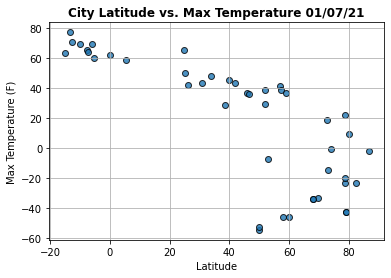

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

# Build the scatter plot for latitude(lats) vs. max temperature (max_temps).
def myScatter(x,y,title,ylabel):
    
    plt.scatter(x,
            y,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

    # Incorporate the other graph properties.
    plt.title(title + time.strftime("%x"), fontsize = 12, fontweight = "bold")
    plt.ylabel(ylabel)
    plt.xlabel("Latitude")
    plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

myScatter(max_temps,lats,f"City Latitude vs. Max Temperature ","Max Temperature (F)")

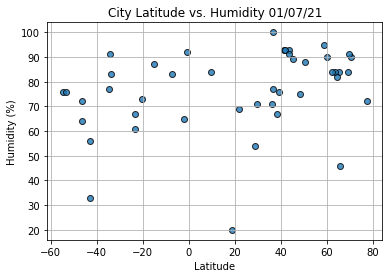

In [57]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

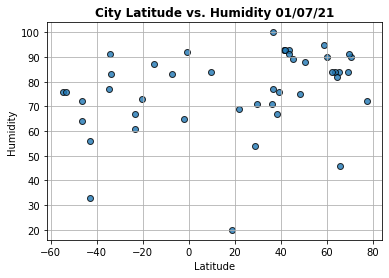

In [58]:
# Build the scatter plots for latitude vs. humidity.
myScatter(lats,humidity,f"City Latitude vs. Humidity ","Humidity")

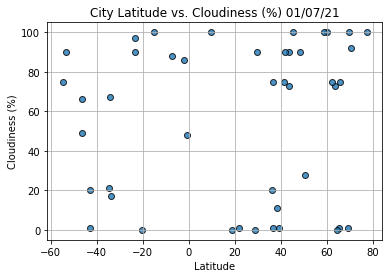

In [59]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
#Show plot.
plt.show()

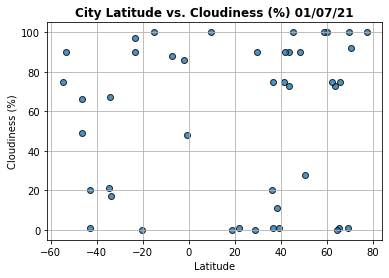

In [60]:
# 6.3.4 Lattitude vs. Cloudiness
myScatter(lats,cloudiness,f"City Latitude vs. Cloudiness (%) ","Cloudiness (%)")

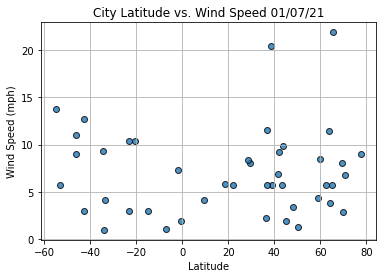

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

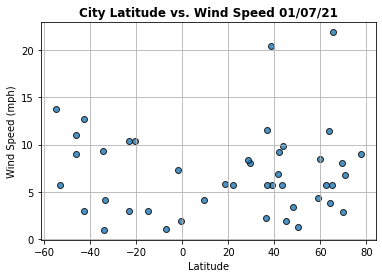

In [62]:
# 6.3.4 Lattitude vs. Wind Speed
myScatter(lats,wind_speed,f"City Latitude vs. Wind Speed ","Wind Speed (mph)")

In [63]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The std_error is: {std_err:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011
The std_error is: 0.137


In [64]:
regress_values = [(lat * slope + intercept) for lat in lats]

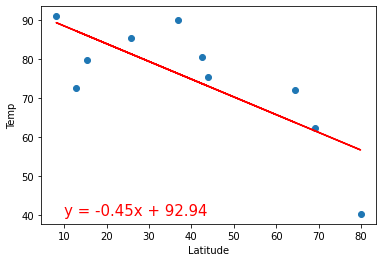

In [66]:
# 6.4.1 Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [44]:
# index13 = city_data_df.loc[13]. Data from row 13
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2021-01-08 01:20:08
Lat                      -34.4187
Lng                       19.2345
Max Temp                       68
Humidity                       77
Cloudiness                     21
Wind Speed                   9.37
Name: 13, dtype: object

In [45]:
# DataFrame based on all Northern Hemisphere lattitudes
city_data_df["Lat"] >= 0

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10    False
11     True
12    False
13    False
14     True
15    False
16    False
17     True
18     True
19     True
20    False
21    False
22     True
23     True
24    False
25     True
26     True
27    False
28     True
29    False
30    False
31    False
32     True
33     True
34     True
35     True
36    False
37    False
38     True
39     True
40     True
41     True
42     True
43     True
Name: Lat, dtype: bool

In [46]:
# First 5 rows
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bilma,NE,2021-01-08 01:20:05,18.6853,12.9164,72.79,20,0,5.88
2,Invermere,CA,2021-01-08 01:20:05,50.5167,-116.0354,25.00,88,28,1.34
3,Minot,US,2021-01-08 01:15:38,48.2325,-101.2963,33.80,75,90,3.44
5,Ammon,US,2021-01-08 01:20:06,43.4696,-111.9666,30.99,93,90,5.75
6,Gornopravdinsk,RU,2021-01-08 01:20:07,60.0500,69.9000,-5.22,90,100,8.46


In [69]:
# 6.4.2 Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [70]:
# Create Northern and Southern Hemispheres' DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

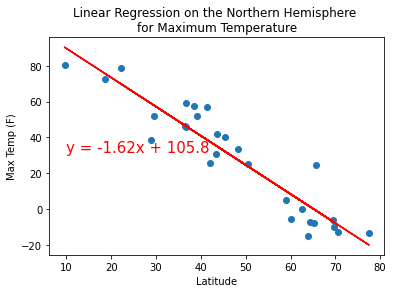

In [71]:
# 6.4.2 Import linregress
from scipy.stats import linregress
# Import Matplotlib.
import matplotlib.pyplot as plt

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", "Max Temp (F)", (10, 32))

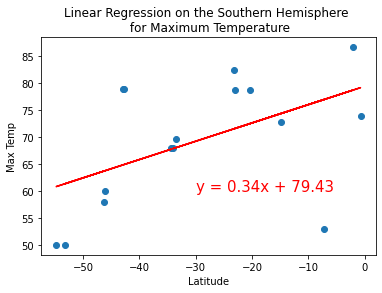

In [79]:
# 6.4.2 Import linregress
from scipy.stats import linregress
# Import Matplotlib.
import matplotlib.pyplot as plt

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,60))

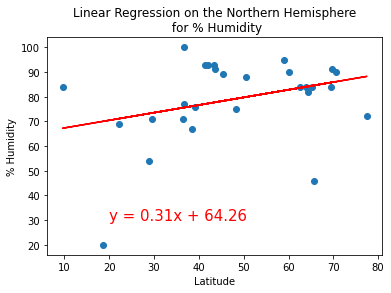

In [78]:
# 6.4.3 Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(20,30))

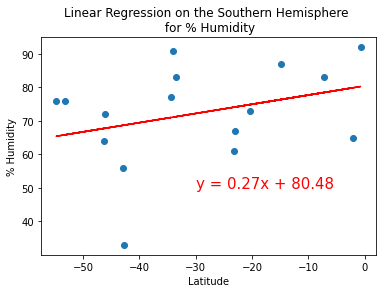

In [76]:
# 6.4.3 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-30,50))

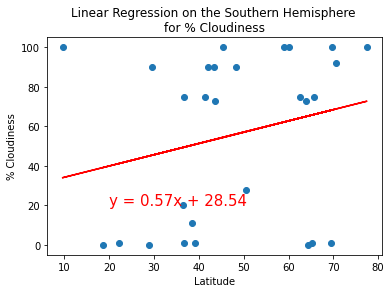

In [81]:
# 6.4.4 Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(20,20))

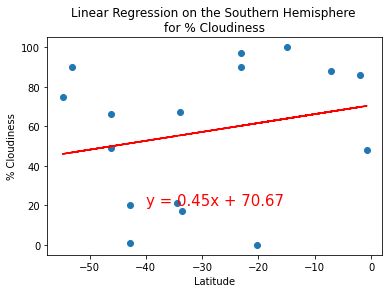

In [82]:
# 6.4.4 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-40,20))

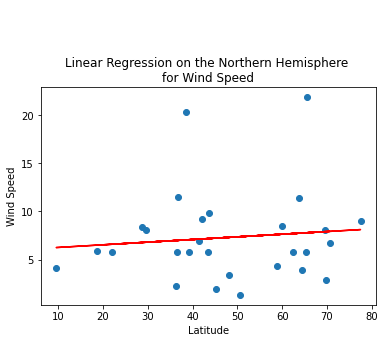

In [83]:
# 6.4.5 Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed','Wind Speed',(40,30))